In [1]:
import pandas as pd
import sqlite3
import logging
import time
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')


In [29]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename = "delivery_performance_logs/ingestion_db.log",
    level = logging.DEBUG,
    format = "%(asctime)s - %(levelname)s - %(message)s",
    filemode = "a"
)

engine = create_engine('sqlite:///delivery_performance.db')

def ingest_db(df, table_name, engine):
    '''this function will ingest the dataframe into datbase table'''
    df.to_sql(table_name, con = engine, if_exists = 'replace', index = False)

def load_raw_data():
    '''this function will load the CSVs as a dataframe and ingest into database'''
    path = r"C:\Users\ACER\Downloads\data" 
    start_time = time.time()
    
    for file in os.listdir(path):
        if file.endswith('.csv'):
            file_path = os.path.join(path, file) 
            df = pd.read_csv(file_path)
            table_name = file[:-4] 
            logging.info(f'Ingesting {file} in Database')
            ingest_db(df, table_name, engine)
    
    end_time = time.time()
    total_time = (end_time - start_time)/60
    logging.info(f'------------------Ingestion Complete------------------')
    logging.info(f'\nTotal Time Taken: {total_time} minutes')

if __name__ == '__main__':
    load_raw_data()

In [3]:

path = "C:\\Users\\ACER\\Downloads\\data"

for file in os.listdir(path):
    if file.endswith('.csv'):
        file_path = os.path.join(path, file)
        df = pd.read_csv(file_path)
        print(f"{file}: {df.shape}")

customers.csv: (2500, 11)
delivery_performance.csv: (5000, 13)
feedback.csv: (5000, 8)
inventory.csv: (75172, 4)
marketing_performance.csv: (5400, 11)
orders.csv: (5000, 9)
order_items.csv: (5000, 4)
products.csv: (268, 10)


In [4]:

tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", engine)

for table_name in tables['name']:
    print(f"---{table_name} ---")

    temp_df = pd.read_sql(f"SELECT * FROM [{table_name}] LIMIT 5", engine)

    display(temp_df)
    print("\n")

---customers ---


,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14




---delivery_performance ---


,order_id,delivery_partner_id,promised_time,actual_time,distance_km,reasons_if_delayed,base_fee,distance_charge,surge_multiplier,seasonal_factor,delay_penalty,fuel_surcharge,delivery_cost
0,1961864118,63230,17-07-2024 08:52,17-07-2024 08:47,0.96,None,35,5.76,1.15,1.12,0.0,1.12,53.62
1,1549769649,14983,28-05-2024 13:25,28-05-2024 13:27,0.98,Traffic,40,5.88,1.20,1.09,0.0,1.79,61.80
2,9185164487,39859,23-09-2024 13:25,23-09-2024 13:29,3.83,Traffic,40,22.06,1.20,1.09,0.0,2.15,83.33
3,9644738826,61497,24-11-2023 16:34,24-11-2023 16:33,2.76,None,45,16.18,1.00,1.07,0.0,1.96,67.42
4,5427684290,84315,20-11-2023 05:17,20-11-2023 05:18,2.63,Traffic,40,15.46,1.25,1.07,0.0,1.28,75.47




---feedback ---


,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20




---inventory ---


,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2




---marketing_performance ---


,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22




---orders ---


,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,17-07-2024 08:34,17-07-2024 08:52,17-07-2024 08:47,3197.07,Cash,63230,4771
1,1549769649,9573071,28-05-2024 13:14,28-05-2024 13:25,28-05-2024 13:27,976.55,Cash,14983,7534
2,9185164487,45477575,23-09-2024 13:07,23-09-2024 13:25,23-09-2024 13:29,839.05,UPI,39859,9886
3,9644738826,88067569,24-11-2023 16:16,24-11-2023 16:34,24-11-2023 16:33,440.23,Card,61497,7917
4,5427684290,83298567,20-11-2023 05:00,20-11-2023 05:17,20-11-2023 05:18,2526.68,Cash,84315,2741




---order_items ---


,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55




---products ---


,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [5]:
from sqlalchemy import create_engine

# Create engine
engine = create_engine('sqlite:///delivery_performance.db')

# CREATE CONNECTION from engine
conn = engine.connect()

# =============================
# **SALES TREND ANALYSIS**
# =============================

## **CREATE SALES ANALYSIS TABLE USING SQL**

In [6]:
print("\n" + "="*80)
print("CREATING SALES ANALYSIS TABLE USING SQL")
print("="*80)

# Create sales analysis table using SQL with CTEs
sales_analysis_data = pd.read_sql_query(
"""
WITH 
order_details AS (
    SELECT 
        o.order_id,
        o.order_date,
        o.customer_id,
        oi.product_id,
        oi.quantity,
        oi.unit_price
    FROM orders o
    INNER JOIN order_items oi ON o.order_id = oi.order_id
),
product_details AS (
    SELECT 
        product_id,
        product_name,
        category,
        brand
    FROM products
)
-- Final select to make summary table
SELECT 
    od.order_id,
    od.order_date,
    od.customer_id,
    od.product_id,
    pd.product_name,
    pd.category,
    pd.brand,
    od.quantity,
    od.unit_price
FROM order_details od
INNER JOIN product_details pd ON od.product_id = pd.product_id
WHERE od.order_date IS NOT NULL
""", conn)

print(" Sales analysis table created successfully")
print(f"Shape: {sales_analysis_data.shape}")
print(f"\nColumns: {list(sales_analysis_data.columns)}")
print(f"\nFirst rows:")
sales_analysis_data.head()


CREATING SALES ANALYSIS TABLE USING SQL
 Sales analysis table created successfully
Shape: (5000, 9)

Columns: ['order_id', 'order_date', 'customer_id', 'product_id', 'product_name', 'category', 'brand', 'quantity', 'unit_price']

First rows:


,order_id,order_date,customer_id,product_id,product_name,category,brand,quantity,unit_price
0,1961864118,17-07-2024 08:34,30065862,642612,Pet Treats,Pet Care,Pillay-Ahuja,3,517.03
1,1549769649,28-05-2024 13:14,9573071,378676,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,1,881.42
2,9185164487,23-09-2024 13:07,45477575,741341,Eggs,Dairy & Breakfast,Prasad LLC,2,923.84
3,9644738826,24-11-2023 16:16,88067569,561860,Orange Juice,Cold Drinks & Juices,Gupta Ltd,1,874.78
4,5427684290,20-11-2023 05:00,83298567,602241,Nuts,Snacks & Munchies,Bahl-Pau,2,976.55


**Achievements:**

    ✓ Created SQL query with CTEs
    ✓ Joined orders, order_items, and product tables
    ✓ Filtered null dates
    ✓ Ordered by order_date descending


In [53]:
cursor = conn.connection.cursor()

In [63]:
# Create new table structure
cursor.execute("""CREATE TABLE sales_analysis (
    order_id INTEGER NOT NULL,
    order_date TEXT NOT NULL,
    customer_id INTEGER,
    product_id INTEGER NOT NULL,
    product_name VARCHAR(200),
    category VARCHAR(100),
    brand VARCHAR(100),
    total_sales DECIMAL(15,2),
    PRIMARY KEY (order_id, product_id)
);
""")

OperationalError: table sales_analysis already exists

In [72]:
sales_analysis_data.to_sql('sales_analysis', conn, if_exists = 'replace', index = False)

5000

In [73]:
pd.read_sql_query("SELECT * FROM sales_analysis", conn)

,order_id,order_date,customer_id,product_id,product_name,category,brand,quantity,unit_price,total_sales,day_of_week,day_num
0,1961864118,2024-07-17 08:34:00,30065862,642612,Pet Treats,Pet Care,Pillay-Ahuja,3,517.03,1551.09,Wednesday,2
1,1549769649,2024-05-28 13:14:00,9573071,378676,Orange Juice,Cold Drinks & Juices,Baral-Kamdar,1,881.42,881.42,Tuesday,1
2,9185164487,2024-09-23 13:07:00,45477575,741341,Eggs,Dairy & Breakfast,Prasad LLC,2,923.84,1847.68,Monday,0
3,9644738826,2023-11-24 16:16:00,88067569,561860,Orange Juice,Cold Drinks & Juices,Gupta Ltd,1,874.78,874.78,Friday,4
4,5427684290,2023-11-20 05:00:00,83298567,602241,Nuts,Snacks & Munchies,Bahl-Pau,2,976.55,1953.10,Monday,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1669690997,2023-12-25 15:46:00,62600289,925482,Frozen Biryani,Instant & Frozen Food,Viswanathan-Sha,3,475.04,1425.12,Monday,0
4996,8340761903,2023-11-27 09:18:00,53640286,124290,Lotion,Personal Care,Sachdev Group,2,39.65,79.30,Monday,0
4997,5936301790,2024-06-21 19:09:00,87059497,491314,Ice Cream,Instant & Frozen Food,Banerjee Inc,3,973.44,2920.32,Friday,4
4998,5710579377,2024-06-06 14:58:00,67310893,319388,Orange Juice,Cold Drinks & Juices,D’Alia-Dey,2,657.80,1315.60,Thursday,3


## **CALCULATE SALES METRICS**

In [7]:
# Convert order_date to datetime
sales_analysis_data['order_date'] = pd.to_datetime(sales_analysis_data['order_date'])

# Calculate total sales
sales_analysis_data['total_sales'] = sales_analysis_data['quantity'] * sales_analysis_data['unit_price']

print("\n" + "="*80)
print("SALES SUMMARY")
print("="*80)
print(f"Total Revenue: ${sales_analysis_data['total_sales'].sum():,.2f}")
print(f"Total Units Sold: {sales_analysis_data['quantity'].sum():,}")
print(f"Total Transactions: {sales_analysis_data['order_id'].nunique():,}")
print(f"Unique Products: {sales_analysis_data['product_id'].nunique()}")
print(f"Unique Categories: {sales_analysis_data['category'].nunique()}")
print(f"Date Range: {sales_analysis_data['order_date'].min()} to {sales_analysis_data['order_date'].max()}")


SALES SUMMARY
Total Revenue: $4,972,415.43
Total Units Sold: 10,034
Total Transactions: 5,000
Unique Products: 268
Unique Categories: 11
Date Range: 2023-03-16 08:10:00 to 2024-11-04 20:29:00


## **Achievements:**

    ✓ Converted order_date to datetime format
    ✓ Created calculated field 'total_sales'
    ✓ Generated sales summary statistics

## **DAILY SALES TRENDS ANALYSIS**

In [8]:
# Aggregate by day
daily_sales = sales_analysis_data.groupby(sales_analysis_data['order_date'].dt.date).agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).reset_index()

daily_sales.columns = ['date', 'revenue', 'units_sold', 'num_orders']

print("="*80)
print("DAILY SALES TRENDS ANALYSIS")
print("="*80)
print(daily_sales.head(10))
print(f"\nAverage Daily Revenue: ${daily_sales['revenue'].mean():,.2f}")
print(f"Average Daily Units: {daily_sales['units_sold'].mean():.0f}")
print(f"Average Daily Orders: {daily_sales['num_orders'].mean():.0f}")
print(f"\nMax Daily Revenue: ${daily_sales['revenue'].max():,.2f}")
print(f"Min Daily Revenue: ${daily_sales['revenue'].min():,.2f}")
print(f"Standard Deviation: ${daily_sales['revenue'].std():,.2f}")

DAILY SALES TRENDS ANALYSIS
         date   revenue  units_sold  num_orders
0  2023-03-16   7257.89          18           9
1  2023-03-17   4193.24           9           6
2  2023-03-18   9591.13          16           7
3  2023-03-19   8379.42          13           7
4  2023-03-20   2531.09           4           4
5  2023-03-21  13299.89          25          13
6  2023-03-22   3833.40          10           6
7  2023-03-23   5289.10           8           5
8  2023-03-24   2354.25           7           4
9  2023-03-25   9946.95          20          11

Average Daily Revenue: $8,287.36
Average Daily Units: 17
Average Daily Orders: 8

Max Daily Revenue: $20,528.02
Min Daily Revenue: $326.06
Standard Deviation: $3,719.63


## **Daily Revenue Trend Visualization**

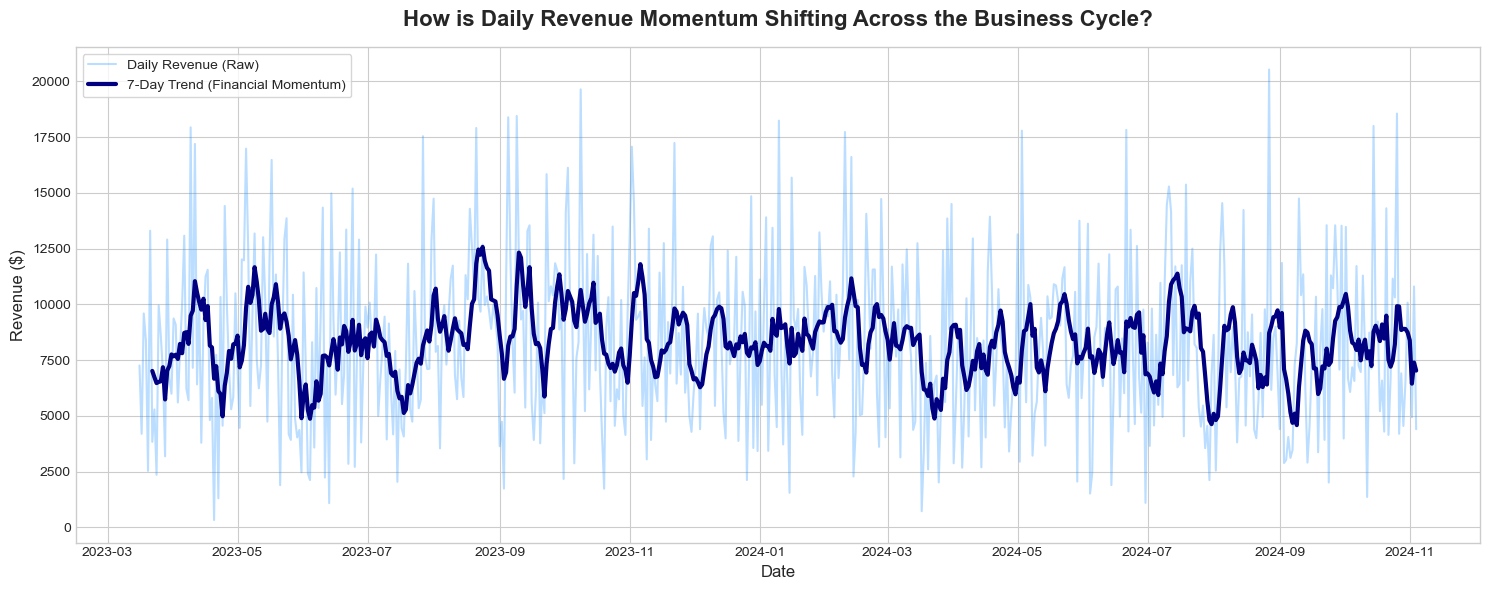

In [9]:

plt.figure(figsize=(15, 6))

# Plot Raw Daily Revenue (The Noise)
plt.plot(daily_sales['date'], daily_sales['revenue'], 
         color='dodgerblue', linewidth=1.5, alpha=0.3, label='Daily Revenue (Raw)')

# Plot 7-Day Moving Average (The Trend)
plt.plot(daily_sales['date'], daily_sales['revenue'].rolling(window=7).mean(), 
         color='navy', linewidth=3, label='7-Day Trend (Financial Momentum)')


plt.title('How is Daily Revenue Momentum Shifting Across the Business Cycle?', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend(loc='upper left', frameon=True)
plt.tight_layout()
plt.show()

## **Daily Units Sold Trend Visualization**

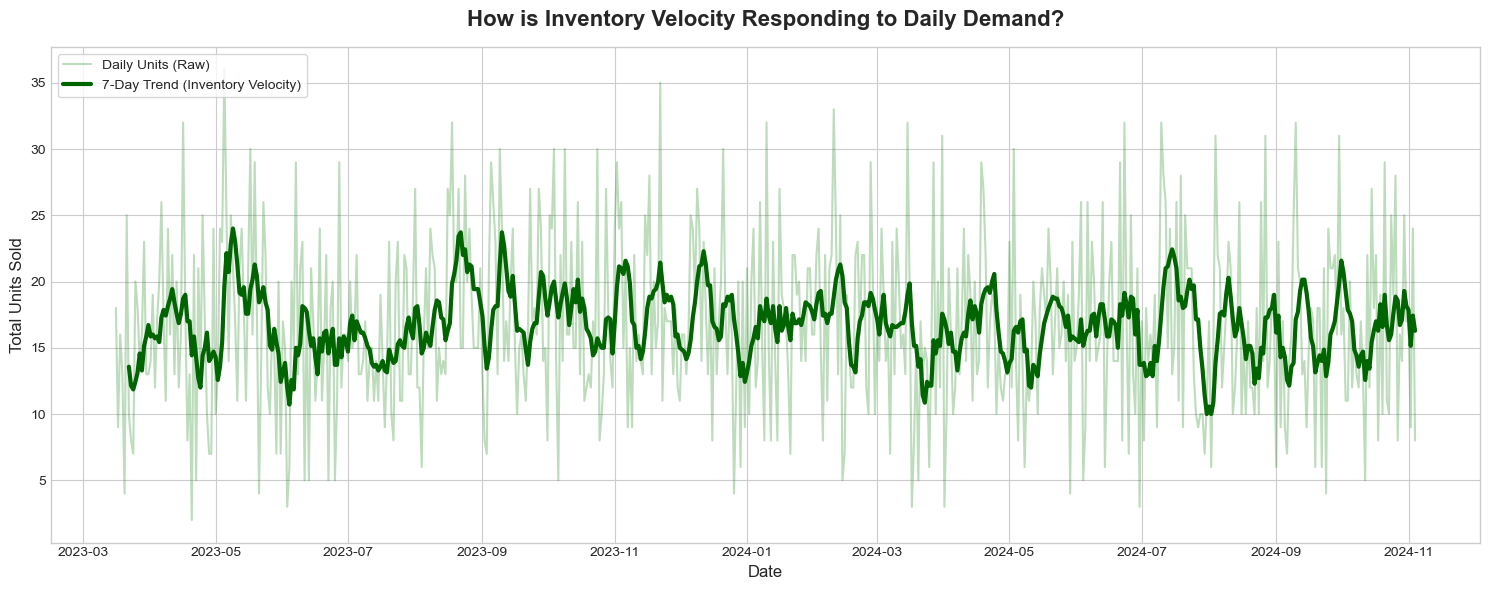

In [10]:

plt.figure(figsize=(15, 6))

# Plot Raw Units Sold (The Noise)
plt.plot(daily_sales['date'], daily_sales['units_sold'], color='forestgreen', linewidth=1.5, alpha=0.3, label='Daily Units (Raw)')

# Plot 7-Day Moving Average (The Trend)
plt.plot(daily_sales['date'], daily_sales['units_sold'].rolling(window=7).mean(), color='darkgreen', linewidth=3, label='7-Day Trend (Inventory Velocity)')

plt.title('How is Inventory Velocity Responding to Daily Demand?', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.legend(loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

## **Daily Orders Trend Visualization**

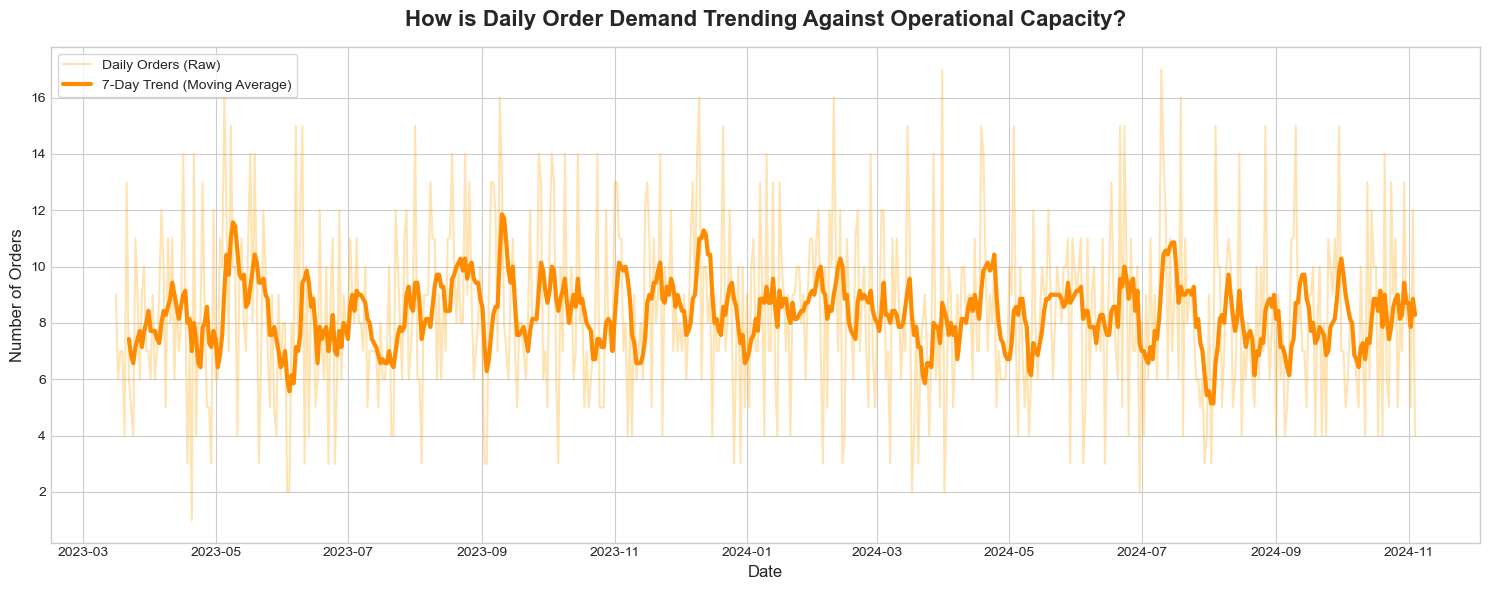

In [11]:

plt.figure(figsize=(15, 6))

# Plot the Raw Data (The "Noise")
plt.plot(daily_sales['date'], daily_sales['num_orders'], 
         color='orange', linewidth=1.5, alpha=0.3, label='Daily Orders (Raw)')

# Add the 7-Day Moving Average (The "Signal")
plt.plot(daily_sales['date'], daily_sales['num_orders'].rolling(window=7).mean(), color='darkorange', linewidth=3, label='7-Day Trend (Moving Average)')

plt.title('How is Daily Order Demand Trending Against Operational Capacity?', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend(loc='upper left', frameon=True, facecolor='white')
plt.tight_layout()
plt.show()

## **WEEKLY SALES TRENDS ANALYSIS**

In [12]:
# Aggregate by week
weekly_sales = sales_analysis_data.groupby(pd.Grouper(key='order_date', freq='W')).agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).reset_index()

weekly_sales.columns = ['date', 'revenue', 'units_sold', 'num_orders']

print("="*80)
print("WEEKLY SALES TRENDS ANALYSIS")
print("="*80)
print(weekly_sales.head(10))
print(f"\nTotal Weeks: {len(weekly_sales)}")
print(f"Average Weekly Revenue: ${weekly_sales['revenue'].mean():,.2f}")
print(f"Max Weekly Revenue: ${weekly_sales['revenue'].max():,.2f}")
print(f"Min Weekly Revenue: ${weekly_sales['revenue'].min():,.2f}")
print(f"\nAverage Weekly Units: {weekly_sales['units_sold'].mean():.0f}")
print(f"Average Weekly Orders: {weekly_sales['num_orders'].mean():.0f}")

WEEKLY SALES TRENDS ANALYSIS
        date   revenue  units_sold  num_orders
0 2023-03-19  29421.68          56          29
1 2023-03-26  45837.51          92          52
2 2023-04-02  54181.20         112          54
3 2023-04-09  66425.09         127          60
4 2023-04-16  65057.09         131          63
5 2023-04-23  41843.22          89          46
6 2023-04-30  57606.40         103          54
7 2023-05-07  70434.49         145          68
8 2023-05-14  67022.14         137          68
9 2023-05-21  62360.50         129          66

Total Weeks: 87
Average Weekly Revenue: $57,154.20
Max Weekly Revenue: $86,234.86
Min Weekly Revenue: $4,398.96

Average Weekly Units: 115
Average Weekly Orders: 57


## **Weekly Revenue Trend Visualization**

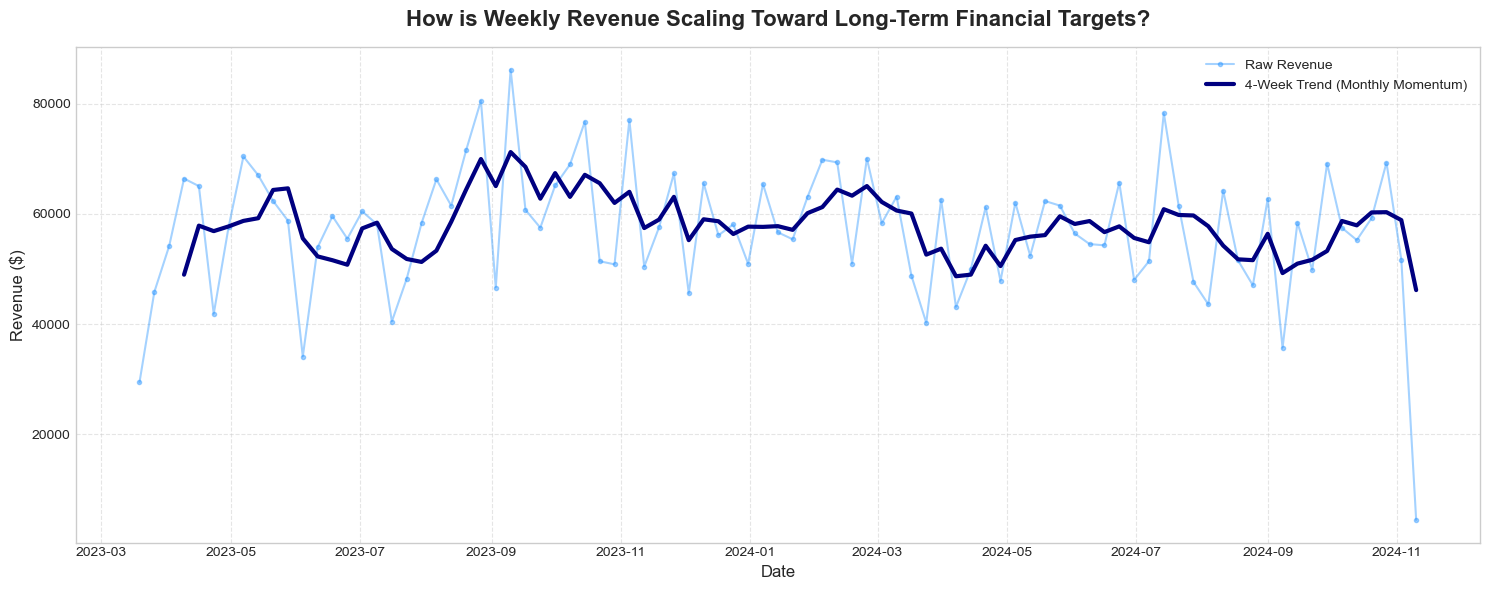

In [13]:

plt.figure(figsize=(15, 6))

# Plot the raw data (Weekly Revenue)
plt.plot(weekly_sales['date'], weekly_sales['revenue'], 
         color='dodgerblue', marker='o', markersize=3, alpha=0.4, label='Raw Revenue')

# 3. Add the Moving Average (The "Trend")
# window=7 is used here for a weekly smoothing effect
plt.plot(weekly_sales['date'], weekly_sales['revenue'].rolling(window=4).mean(), 
         color='navy', linewidth=3, label='4-Week Trend (Monthly Momentum)')

# 4. Professional Formatting
plt.title('How is Weekly Revenue Scaling Toward Long-Term Financial Targets?', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

plt.show()

## **Weekly Orders Trend Visualization**

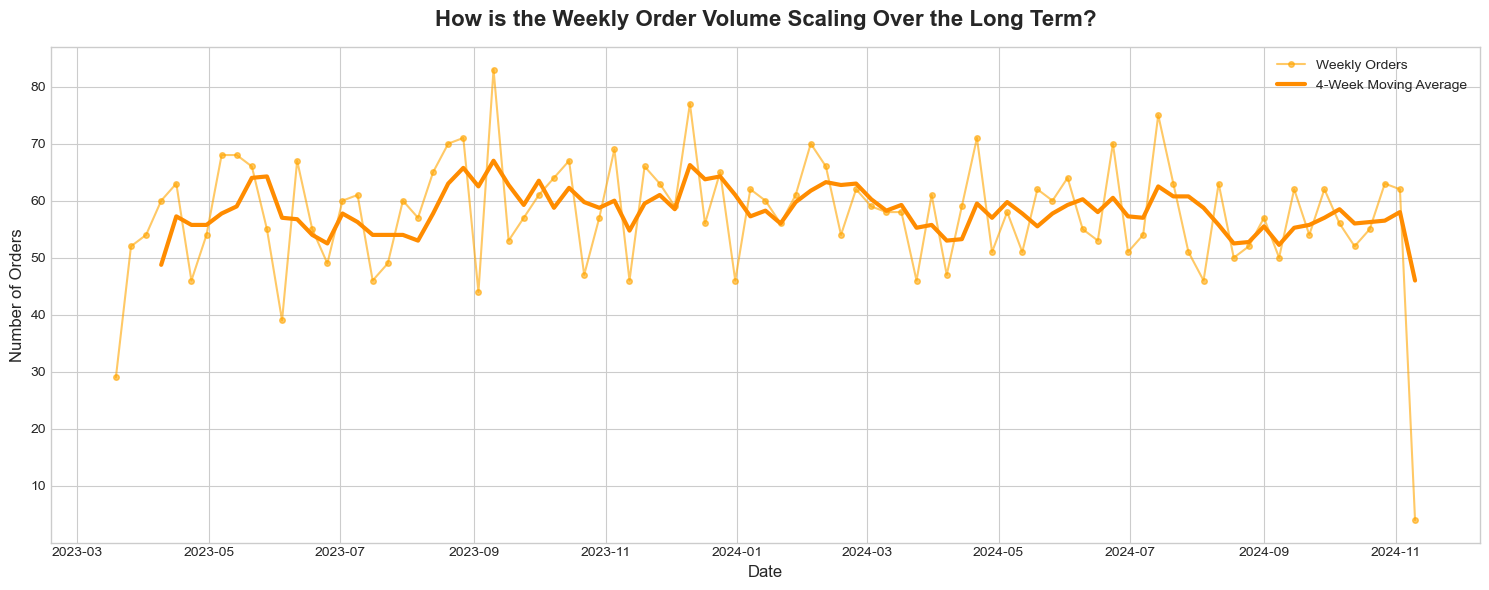

In [14]:

# 1. Create the figure
plt.figure(figsize=(15, 6))

# 2. Plot the raw weekly data as a line
# Using markers helps the viewer see the individual data points on the line
plt.plot(weekly_sales['date'], weekly_sales['num_orders'], color='orange', marker='o', markersize=4, alpha=0.6, label='Weekly Orders')

# 3. Add a Moving Average Trend
# This helps identify if the 'Weekly Order Count' is fundamentally growing
plt.plot(weekly_sales['date'], weekly_sales['num_orders'].rolling(window=4).mean(), color='darkorange', linewidth=3, label='4-Week Moving Average')

plt.title('How is the Weekly Order Volume Scaling Over the Long Term?', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

## **Weekly Units Sold Trend Visualization**

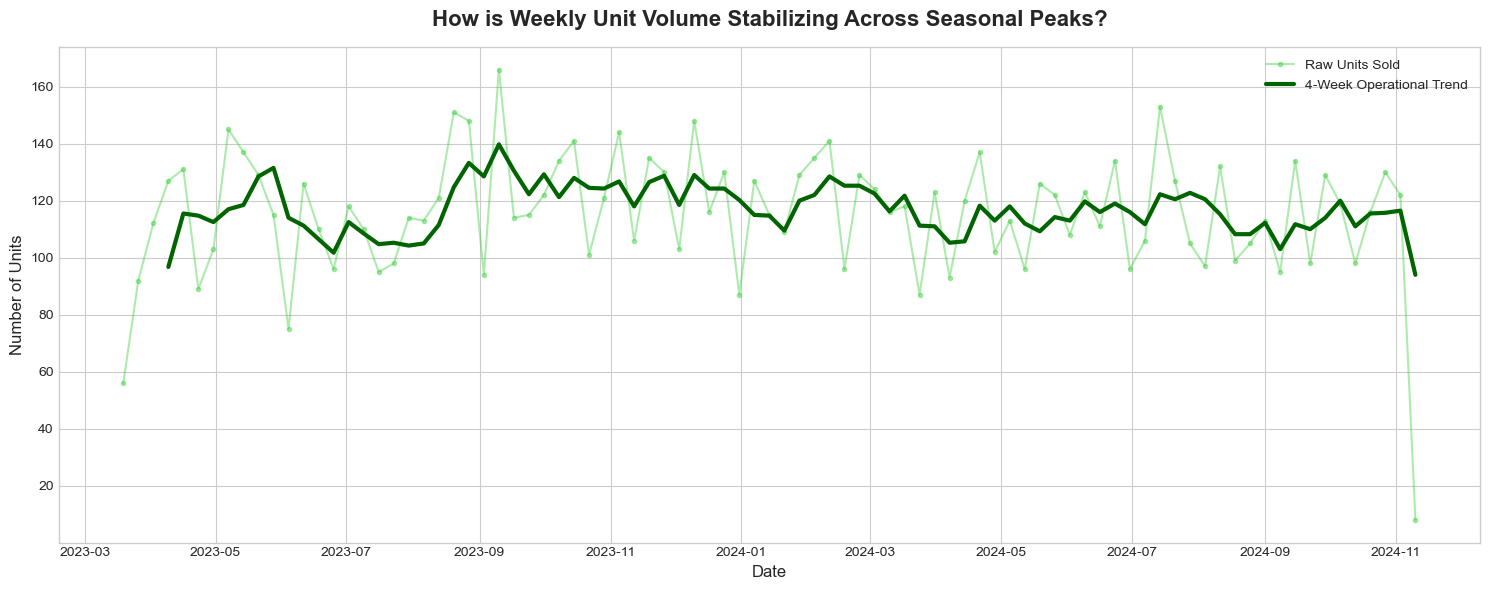

In [15]:

plt.figure(figsize=(15, 6))

# 2. Plot the raw data (Weekly Units Sold)
plt.plot(weekly_sales['date'], weekly_sales['units_sold'], color='limegreen', marker='o', markersize=3, alpha=0.4, label='Raw Units Sold')

# 3. Add the Moving Average (The "Trend")
plt.plot(weekly_sales['date'], weekly_sales['units_sold'].rolling(window=4).mean(), color='darkgreen', linewidth=3, label='4-Week Operational Trend')

# 4. Professional Formatting
plt.title('How is Weekly Unit Volume Stabilizing Across Seasonal Peaks?', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Units', fontsize=12)
plt.legend()
plt.tight_layout()

plt.show()

## **MONTHLY SALES TRENDS ANALYSIS**

In [16]:
# Aggregate by month
monthly_sales = sales_analysis_data.groupby(pd.Grouper(key='order_date', freq='M')).agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).reset_index()
monthly_sales.columns = ['date', 'revenue', 'units_sold', 'num_orders']
monthly_sales['month_name'] = monthly_sales['date'].dt.strftime('%Y-%m')

# Calculate month-over-month growth for all three metrics
monthly_sales['revenue_growth'] = monthly_sales['revenue'].pct_change() * 100
monthly_sales['units_growth'] = monthly_sales['units_sold'].pct_change() * 100
monthly_sales['orders_growth'] = monthly_sales['num_orders'].pct_change() * 100

print("="*80)
print("MONTHLY SALES TRENDS ANALYSIS")
print("="*80)
print(monthly_sales)
print(f"\nTotal Months: {len(monthly_sales)}")
print(f"\nAverage Monthly Revenue: ${monthly_sales['revenue'].mean():,.2f}")
print(f"Average Monthly Revenue Growth: {monthly_sales['revenue_growth'].mean():.2f}%")
print(f"\nAverage Monthly Units Sold: {monthly_sales['units_sold'].mean():,.0f}")
print(f"Average Monthly Units Growth: {monthly_sales['units_growth'].mean():.2f}%")
print(f"\nAverage Monthly Orders: {monthly_sales['num_orders'].mean():,.0f}")
print(f"Average Monthly Orders Growth: {monthly_sales['orders_growth'].mean():.2f}%")

MONTHLY SALES TRENDS ANALYSIS
         date    revenue  units_sold  num_orders month_name  revenue_growth  \
0  2023-03-31  110989.65         227         120    2023-03             NaN   
1  2023-04-30  249382.54         483         238    2023-04      124.689906   
2  2023-05-31  269445.26         560         276    2023-05        8.044958   
3  2023-06-30  233672.95         457         232    2023-06      -13.276281   
4  2023-07-31  237060.98         470         244    2023-07        1.449903   
5  2023-08-31  303511.99         580         285    2023-08       28.031188   
6  2023-09-30  277585.47         537         262    2023-09       -8.542173   
7  2023-10-31  263859.88         531         254    2023-10       -4.944636   
8  2023-11-30  261474.62         549         265    2023-11       -0.903987   
9  2023-12-31  253628.38         524         268    2023-12       -3.000765   
10 2024-01-31  273090.91         538         270    2024-01        7.673640   
11 2024-02-29  260130.

## **Monthly Revenue Trend Visualization**

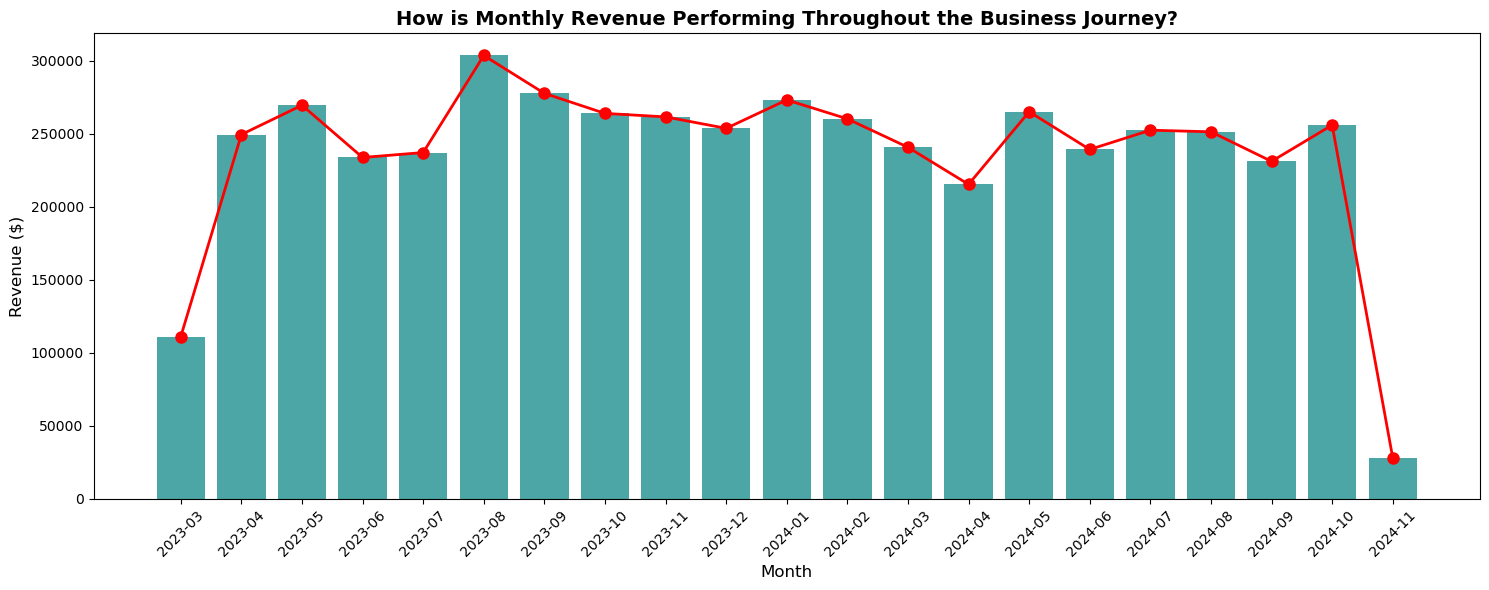

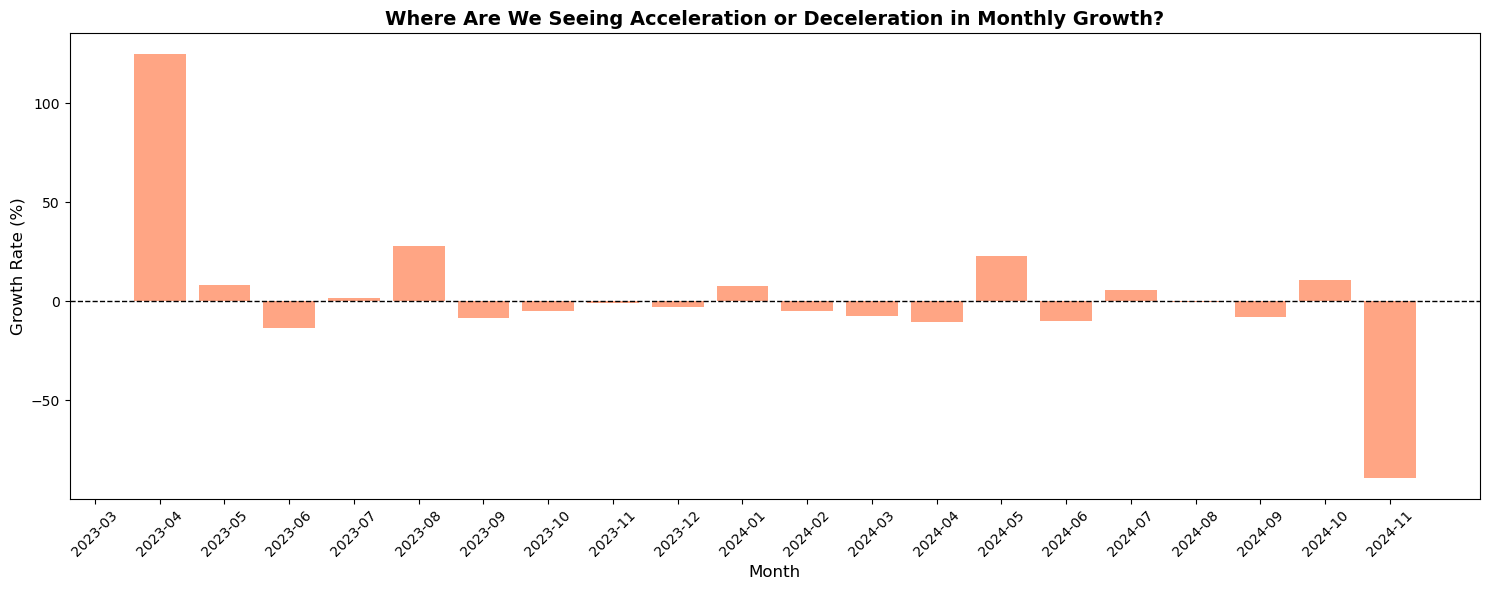

In [31]:
# Revenue - Absolute Values

with plt.style.context('default'):
    plt.figure(figsize=(15, 6))
    plt.bar(monthly_sales['month_name'], monthly_sales['revenue'], color='teal', alpha=0.7)
    plt.plot(monthly_sales['month_name'], monthly_sales['revenue'], marker='o', color='red', linewidth=2, markersize=8)
    plt.title('How is Monthly Revenue Performing Throughout the Business Journey?', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Revenue ($)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Revenue - Growth Rate (MoM %)

with plt.style.context('default'):
    plt.figure(figsize=(15, 6))
    plt.bar(monthly_sales['month_name'], monthly_sales['revenue_growth'], color='coral', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title('Where Are We Seeing Acceleration or Deceleration in Monthly Growth?', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Monthly Unit Sold Trend Visualization**

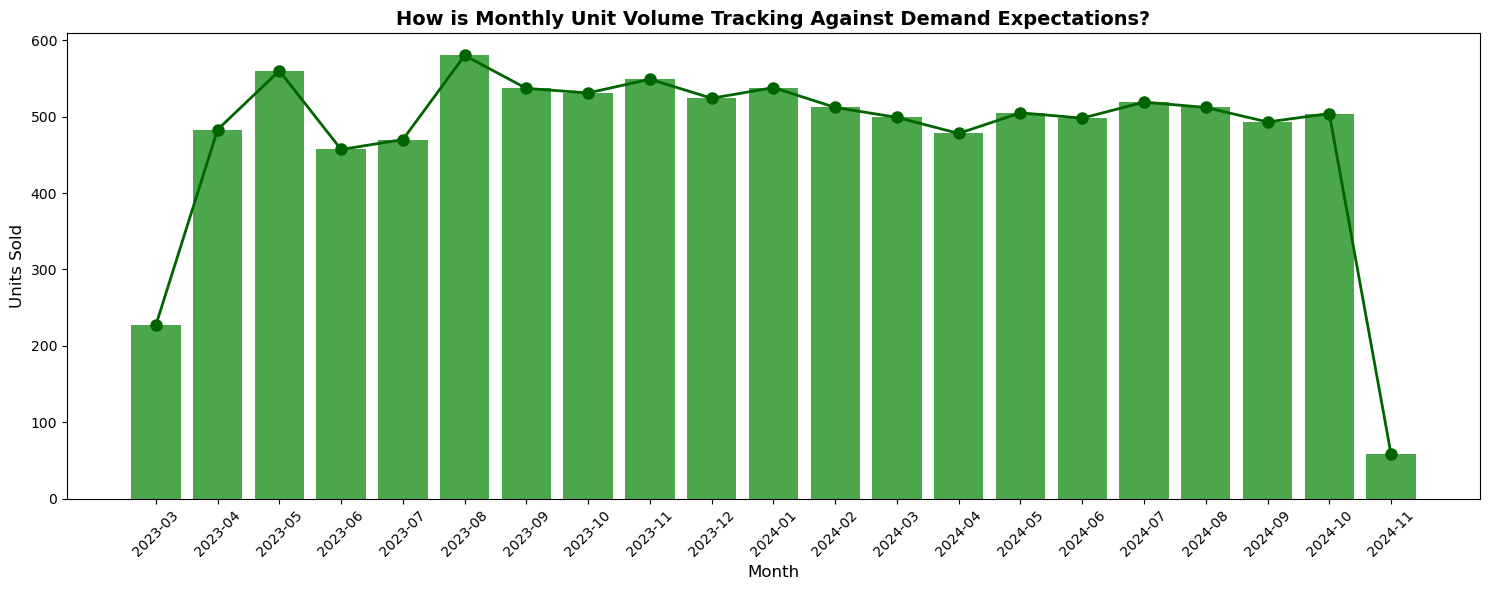

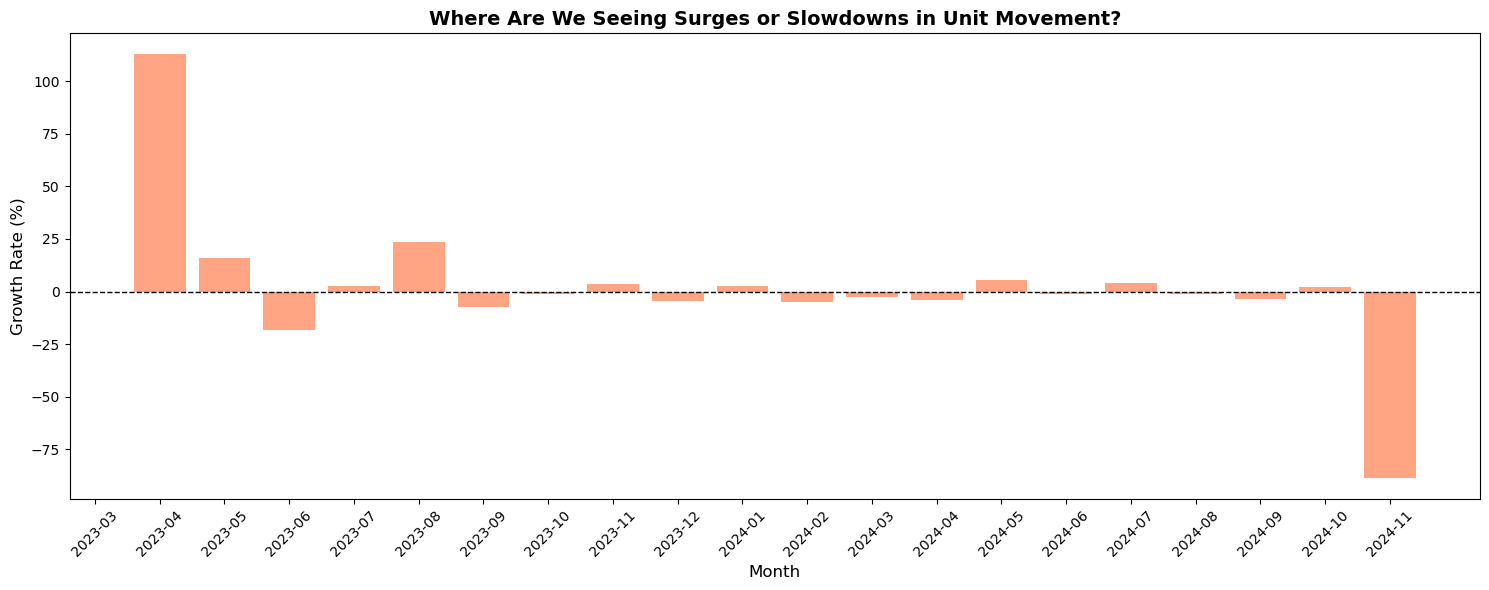

In [33]:
# Units Sold - Absolute Values

with plt.style.context('default'):
    plt.figure(figsize=(15, 6))
    plt.bar(monthly_sales['month_name'], monthly_sales['units_sold'], color='green', alpha=0.7)
    plt.plot(monthly_sales['month_name'], monthly_sales['units_sold'], marker='o', color='darkgreen', linewidth=2, markersize=8)
    plt.title('How is Monthly Unit Volume Tracking Against Demand Expectations?', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Units Sold', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Units Sold - Growth Rate (MoM %)

with plt.style.context('default'):    
    plt.figure(figsize=(15, 6))
    plt.bar(monthly_sales['month_name'], monthly_sales['units_growth'], color='coral', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title('Where Are We Seeing Surges or Slowdowns in Unit Movement?', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Monthly Unit Sold Trend Visualization**

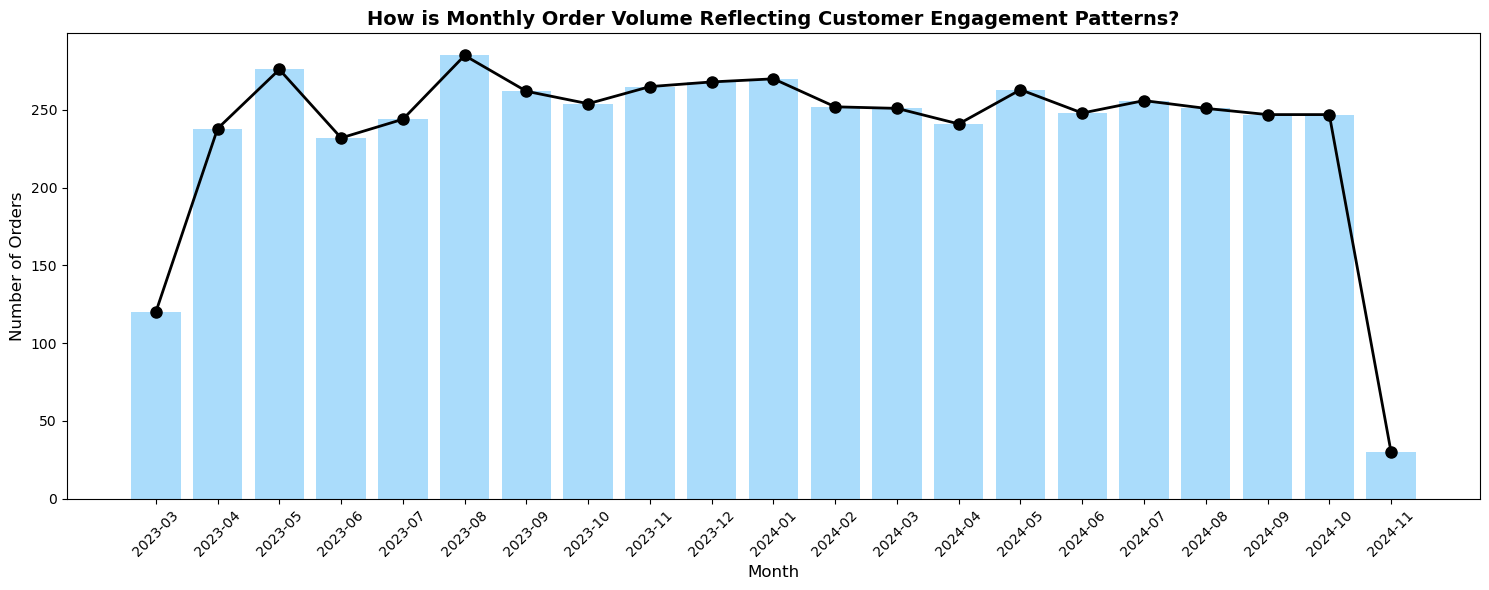

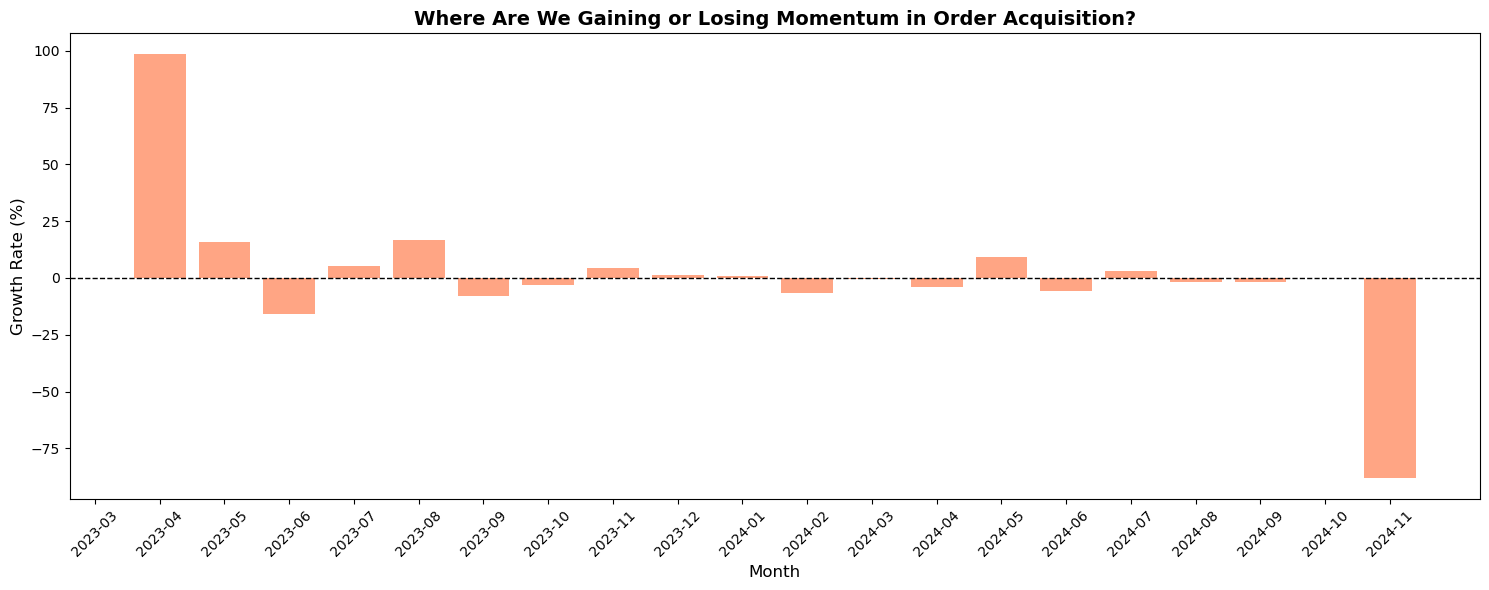

In [34]:
# Number of Orders - Absolute Values

with plt.style.context('default'):
    plt.figure(figsize=(15, 6))
    plt.bar(monthly_sales['month_name'], monthly_sales['num_orders'], color='lightskyblue', alpha=0.7)
    plt.plot(monthly_sales['month_name'], monthly_sales['num_orders'], marker='o', color='black', linewidth=2, markersize=8)
    plt.title('How is Monthly Order Volume Reflecting Customer Engagement Patterns?', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Orders', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Number of Orders - Growth Rate (MoM %)

with plt.style.context('default'):
    plt.figure(figsize=(15, 6))
    plt.bar(monthly_sales['month_name'], monthly_sales['orders_growth'], color='coral', alpha=0.7)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.title('Where Are We Gaining or Losing Momentum in Order Acquisition?', fontsize=14, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Growth Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **DAY OF WEEK ANALYSIS**

In [20]:
# Extract day of week from order_date
sales_analysis_data['day_of_week'] = sales_analysis_data['order_date'].dt.day_name()
sales_analysis_data['day_num'] = sales_analysis_data['order_date'].dt.dayofweek  # 0=Monday, 6=Sunday

# Aggregate by day of week
day_of_week_sales = sales_analysis_data.groupby(['day_num', 'day_of_week']).agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).reset_index()
day_of_week_sales.columns = ['day_num', 'day_of_week', 'revenue', 'units_sold', 'num_orders']

# Sort by day number to ensure proper order (Monday to Sunday)
day_of_week_sales = day_of_week_sales.sort_values('day_num')

# Calculate average per day
day_of_week_sales['avg_revenue_per_day'] = day_of_week_sales['revenue'] / len(sales_analysis_data['order_date'].dt.to_period('D').unique())
day_of_week_sales['avg_units_per_day'] = day_of_week_sales['units_sold'] / len(sales_analysis_data['order_date'].dt.to_period('D').unique())
day_of_week_sales['avg_orders_per_day'] = day_of_week_sales['num_orders'] / len(sales_analysis_data['order_date'].dt.to_period('D').unique())

print("="*80)
print("DAY OF WEEK ANALYSIS")
print("="*80)
print(day_of_week_sales)
print(f"\nBest Day for Revenue: {day_of_week_sales.loc[day_of_week_sales['revenue'].idxmax(), 'day_of_week']}")
print(f"Best Day for Units Sold: {day_of_week_sales.loc[day_of_week_sales['units_sold'].idxmax(), 'day_of_week']}")
print(f"Best Day for Orders: {day_of_week_sales.loc[day_of_week_sales['num_orders'].idxmax(), 'day_of_week']}")
print(f"\nWorst Day for Revenue: {day_of_week_sales.loc[day_of_week_sales['revenue'].idxmin(), 'day_of_week']}")
print(f"Worst Day for Units Sold: {day_of_week_sales.loc[day_of_week_sales['units_sold'].idxmin(), 'day_of_week']}")
print(f"Worst Day for Orders: {day_of_week_sales.loc[day_of_week_sales['num_orders'].idxmin(), 'day_of_week']}")


DAY OF WEEK ANALYSIS
   day_num day_of_week    revenue  units_sold  num_orders  \
0        0      Monday  693907.44        1373         687   
1        1     Tuesday  735500.53        1421         705   
2        2   Wednesday  753018.67        1532         744   
3        3    Thursday  716915.86        1438         720   
4        4      Friday  678558.21        1423         715   
5        5    Saturday  700107.86        1409         706   
6        6      Sunday  694406.86        1438         723   

   avg_revenue_per_day  avg_units_per_day  avg_orders_per_day  
0          1156.512400           2.288333            1.145000  
1          1225.834217           2.368333            1.175000  
2          1255.031117           2.553333            1.240000  
3          1194.859767           2.396667            1.200000  
4          1130.930350           2.371667            1.191667  
5          1166.846433           2.348333            1.176667  
6          1157.344767           2.396667 

## **REVENUE BY DAY OF WEEK VISUALIZATION**

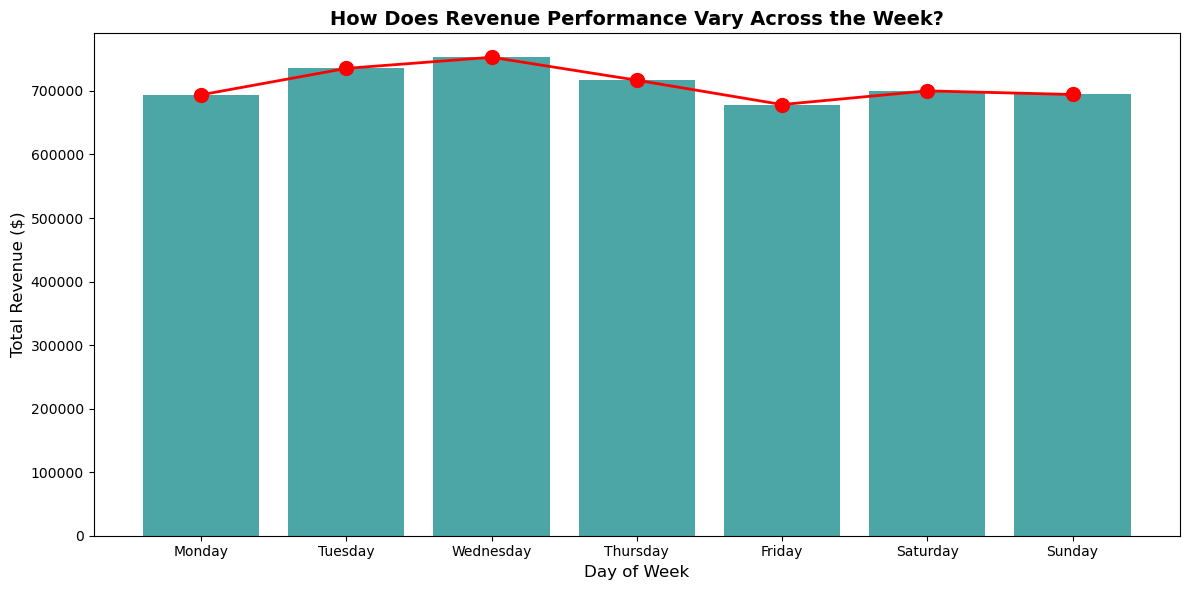

In [35]:
with plt.style.context('default'):
    plt.figure(figsize=(12, 6))
    plt.bar(day_of_week_sales['day_of_week'], day_of_week_sales['revenue'], color='teal', alpha=0.7)
    plt.plot(day_of_week_sales['day_of_week'], day_of_week_sales['revenue'], marker='o', color='red', linewidth=2, markersize=10)
    plt.title('How Does Revenue Performance Vary Across the Week?', fontsize=14, fontweight='bold')
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Total Revenue ($)', fontsize=12)
    plt.tight_layout()
    plt.show()

## **UNITS SOLD BY DAY OF WEEK VISUALIZATION**

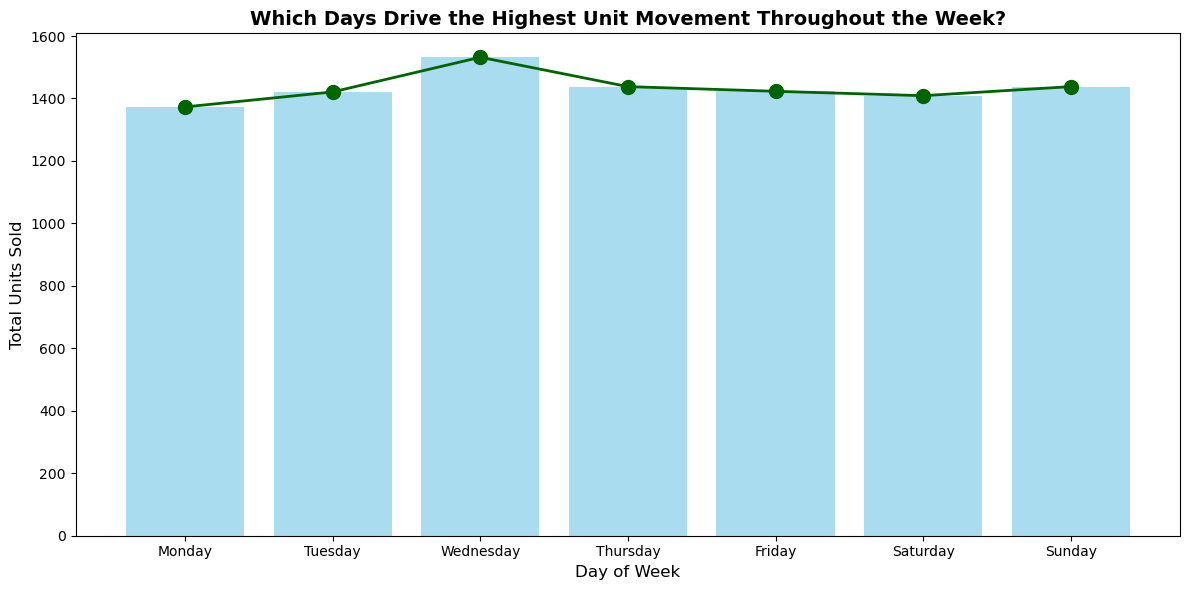

In [37]:
with plt.style.context('default'):    
    plt.figure(figsize=(12, 6))
    plt.bar(day_of_week_sales['day_of_week'], day_of_week_sales['units_sold'], color='skyblue', alpha=0.7)
    plt.plot(day_of_week_sales['day_of_week'], day_of_week_sales['units_sold'], marker='o', color='darkgreen', linewidth=2, markersize=10)
    plt.title('Which Days Drive the Highest Unit Movement Throughout the Week?', fontsize=14, fontweight='bold')
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Total Units Sold', fontsize=12)
    plt.tight_layout()
    plt.show()

## **NUMBER OF ORDERS BY DAY OF WEEK VISUALIZATION**

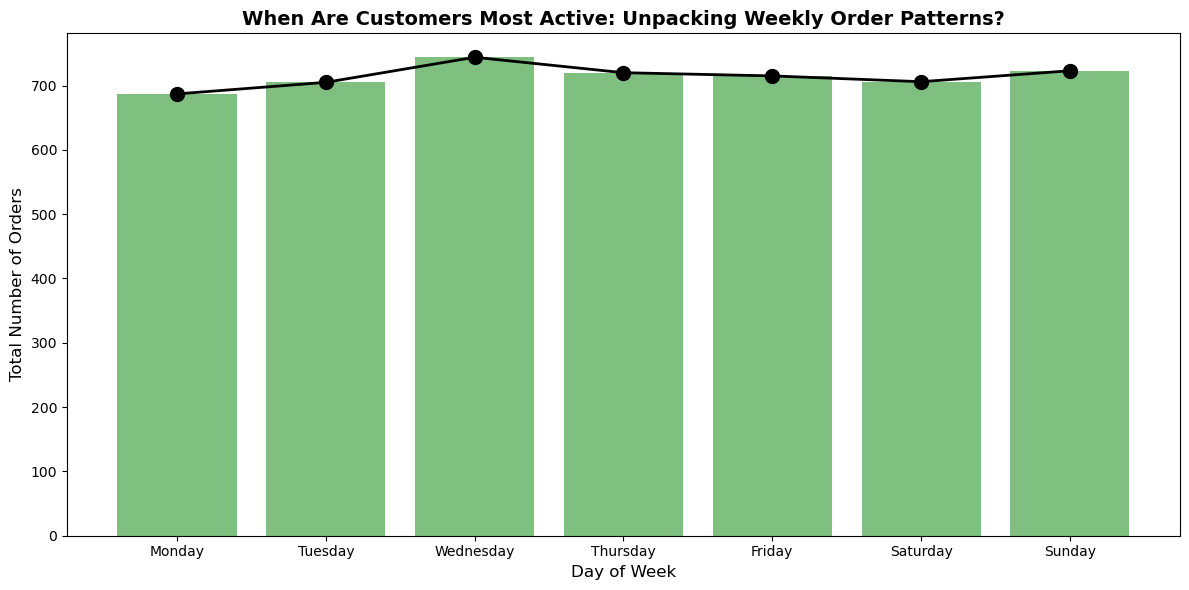

In [47]:
with plt.style.context('default'):    
    plt.figure(figsize=(12, 6))
    plt.bar(day_of_week_sales['day_of_week'], day_of_week_sales['num_orders'], color='green', alpha=0.5)
    plt.plot(day_of_week_sales['day_of_week'], day_of_week_sales['num_orders'], marker='o', color='black', linewidth=2, markersize=10)
    plt.title('When Are Customers Most Active: Unpacking Weekly Order Patterns?', fontsize=14, fontweight='bold')
    plt.xlabel('Day of Week', fontsize=12)
    plt.ylabel('Total Number of Orders', fontsize=12)
    plt.tight_layout()
    plt.show()

## **CATEGORY-WISE SALES ANALYSIS**

In [24]:
# Overall category performance
category_summary = sales_analysis_data.groupby('category').agg({
    'total_sales': 'sum',
    'quantity': 'sum',
    'order_id': 'nunique'
}).reset_index()

category_summary.columns = ['category', 'total_revenue', 'total_units', 'num_orders']
category_summary = category_summary.sort_values('total_revenue', ascending=False)

print("="*80)
print("CATEGORY PERFORMANCE ANALYSIS")
print("="*80)
print(category_summary)
print(f"\nTop Category: {category_summary.iloc[0]['category']}")
print(f"Top Category Revenue: ${category_summary.iloc[0]['total_revenue']:,.2f}")
print(f"Top Category Share: {category_summary.iloc[0]['total_revenue']/category_summary['total_revenue'].sum()*100:.1f}%")

CATEGORY PERFORMANCE ANALYSIS
                 category  total_revenue  total_units  num_orders
2       Dairy & Breakfast      639222.19         1114         566
9                Pharmacy      592368.57          973         481
3     Fruits & Vegetables      559053.08          966         492
8                Pet Care      539888.75         1003         501
5          Household Care      444244.25         1078         509
7           Personal Care      394894.61          887         454
10      Snacks & Munchies      394648.71          963         483
1    Cold Drinks & Juices      392717.62          758         375
4       Grocery & Staples      359937.82          895         449
0               Baby Care      348227.18          655         334
6   Instant & Frozen Food      307212.65          742         356

Top Category: Dairy & Breakfast
Top Category Revenue: $639,222.19
Top Category Share: 12.9%


## **Total Revenue by Category Visualization**

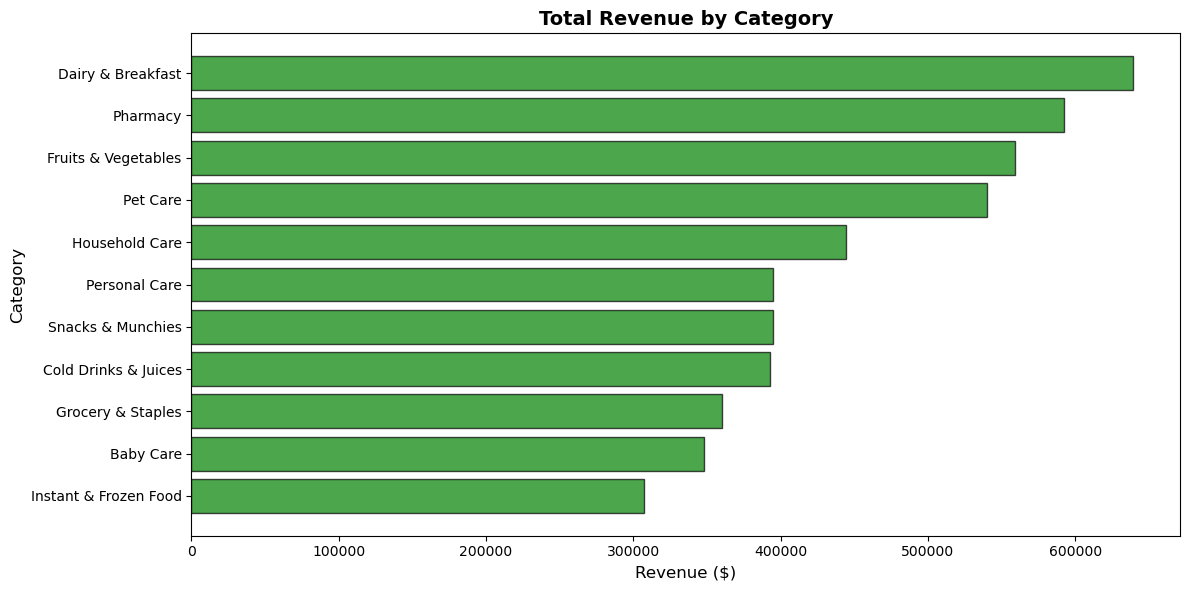

In [25]:
with plt.style.context('default'):
    plt.figure(figsize=(12, 6))
    plt.barh(category_summary.sort_values('total_revenue')['category'], 
             category_summary.sort_values('total_revenue')['total_revenue'], 
             color='green', edgecolor='black', alpha=0.7)
    plt.title('Total Revenue by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Revenue ($)', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()

## **Number of Orders by Category Visualization**

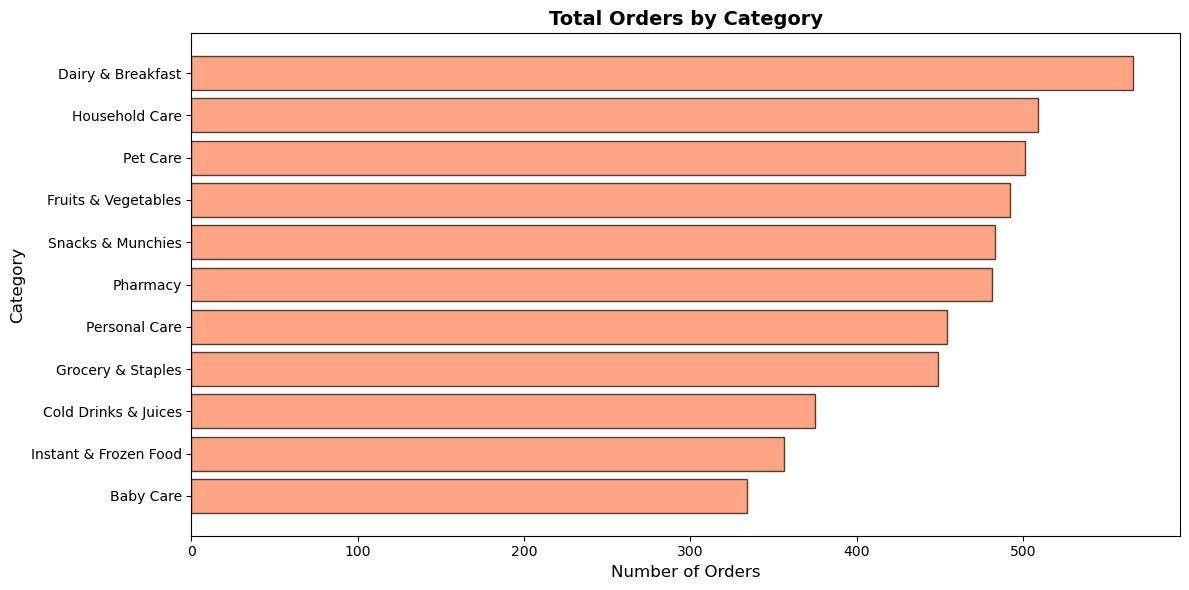

In [40]:
with plt.style.context('default'):
    plt.figure(figsize=(12, 6))
    plt.barh(category_summary.sort_values('num_orders')['category'], 
             category_summary.sort_values('num_orders')['num_orders'], 
             color='coral', edgecolor='black', alpha=0.7)
    plt.title('Total Orders by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Orders', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()

## **Number of Orders by Category Visualization**

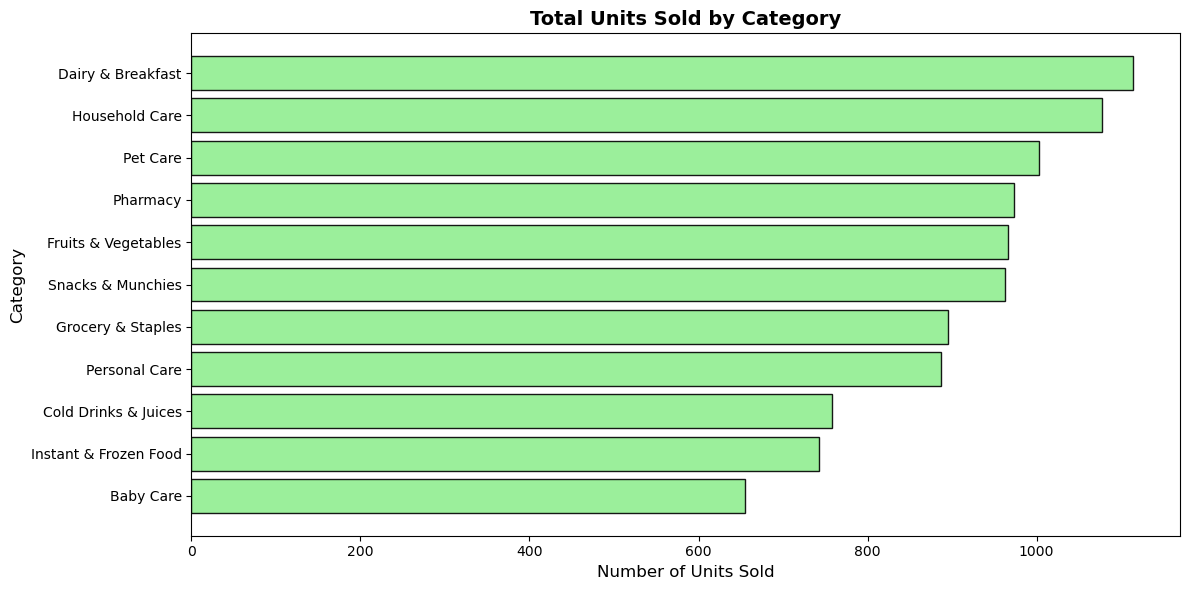

In [49]:
with plt.style.context('default'):
    plt.figure(figsize=(12, 6))
    plt.barh(category_summary.sort_values('total_units')['category'], 
             category_summary.sort_values('total_units')['total_units'], 
             color='lightgreen', edgecolor='black', alpha=0.9)
    plt.title('Total Units Sold by Category', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Units Sold', fontsize=12)
    plt.ylabel('Category', fontsize=12)
    plt.tight_layout()
    plt.show()